### Data loading

In [27]:
import pandas as pd
import os

In [28]:
#collection 1
first_file = pd.read_csv("../../data/common_voice/cv-corpus-20.0-2024-12-06/ne-NP/train.tsv", sep="\t")
second_file = pd.read_csv("../../data/common_voice/cv-corpus-20.0-2024-12-06/ne-NP/test.tsv", sep="\t")
third_file = pd.read_csv("../../data/common_voice/cv-corpus-20.0-2024-12-06/ne-NP/validated.tsv", sep="\t")
#collection 2
fourth_file = pd.read_csv("../../data/common_voice/cv-corpus-21.0-2025-03-14/ne-NP/train.tsv", sep="\t")
fifth_file = pd.read_csv("../../data/common_voice/cv-corpus-21.0-2025-03-14/ne-NP/test.tsv", sep="\t")
sixth_file = pd.read_csv("../../data/common_voice/cv-corpus-21.0-2025-03-14/ne-NP/validated.tsv", sep="\t")
#collection 3
seventh_file = pd.read_csv("../../data/common_voice/cv-corpus-22.0-2025-06-20/ne-NP/train.tsv", sep="\t")
eighth_file = pd.read_csv("../../data/common_voice/cv-corpus-22.0-2025-06-20/ne-NP/test.tsv", sep="\t")
nineth_file = pd.read_csv("../../data/common_voice/cv-corpus-22.0-2025-06-20/ne-NP/validated.tsv", sep="\t")


collection1_df = pd.concat([first_file, second_file, third_file], ignore_index=True)
collection2_df = pd.concat([fourth_file, fifth_file, sixth_file], ignore_index=True)
collection3_df = pd.concat([seventh_file, eighth_file, nineth_file], ignore_index=True)


In [29]:
collection1_df.head(3)

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,9f8a47cee5574b287a8f93f5498d81115cf1dfbd718ead...,common_voice_ne-NP_35314089.mp3,9667b672ce0fb23dc129d1f29bff6d60993577257b9a72...,म पनि जान्छु है त अहिले लाई ।,NaN,4,0,thirties,male_masculine,nepali,NaN,ne-NP,NaN
1,9f8a47cee5574b287a8f93f5498d81115cf1dfbd718ead...,common_voice_ne-NP_35314090.mp3,8829cb3c487aaf961de6819a419a77a35b9727fc8deb2c...,थाहा छैन ।,NaN,4,0,thirties,male_masculine,nepali,NaN,ne-NP,NaN
2,9f8a47cee5574b287a8f93f5498d81115cf1dfbd718ead...,common_voice_ne-NP_35314091.mp3,874b3b2bc8dc7d0b8db615671e8a14872794798701f245...,म खाना पकाउँदै छु ।,NaN,4,0,thirties,male_masculine,nepali,NaN,ne-NP,NaN


In [30]:
print(collection1_df.shape)
print(collection2_df.shape)
print(collection3_df.shape)

(1339, 13)
(1791, 13)
(1812, 13)


In [31]:
#collection 1
collection1_path = "../../data/common_voice/cv-corpus-20.0-2024-12-06/ne-NP/clips"
#collection 2
collection2_path = "../../data/common_voice/cv-corpus-21.0-2025-03-14/ne-NP/clips"
#collection2
collection3_path = "../../data/common_voice/cv-corpus-22.0-2025-06-20/ne-NP/clips"


In [32]:
#updating full path for each collection
collection1_df['full_path'] = collection1_df['path'].apply(lambda x: os.path.join(collection1_path, x))
collection2_df['full_path'] = collection2_df['path'].apply(lambda x: os.path.join(collection2_path, x))
collection3_df['full_path'] = collection3_df['path'].apply(lambda x: os.path.join(collection3_path, x))


In [33]:
collection1_df.sample()

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment,full_path
10,9f8a47cee5574b287a8f93f5498d81115cf1dfbd718ead...,common_voice_ne-NP_35314124.mp3,76e4fa4a0647a130006535cbe2801228e5c70bfad9a265...,नतिजा आफ्नो पोल्टामा परेन ।,NaN,4,0,thirties,male_masculine,nepali,NaN,ne-NP,NaN,../../data/common_voice/cv-corpus-20.0-2024-12...


In [34]:
collection2_df.sample()

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment,full_path
560,eef9c384331ef17a1eaa55c237efb21fc64df92aab34eb...,common_voice_ne-NP_33453820.mp3,2e4ae79f21b166acbb40906cece2b3bc6a1604ba05e2c1...,हाम्रो झण्डा फरर ।,NaN,2,0,NaN,NaN,NaN,NaN,ne-NP,NaN,../../data/common_voice/cv-corpus-21.0-2025-03...


In [35]:
#combining all collection to a single dataframe
collection = pd.concat([collection1_df, collection2_df, collection3_df], ignore_index=True)
collection = collection[['full_path', 'sentence', 'gender']].copy()
collection.shape

(4942, 3)

In [36]:
#filtring -> removing female_feminine -> confident female voice
print("== Before ==\n")
# Unique values
print(collection['gender'].unique())

# Count of each unique value
print(collection['gender'].value_counts())

print("\n== After==\n")

male_collection =  collection[collection['gender'] != 'female_feminine'].copy()
# Unique values
print(male_collection['gender'].unique())

# Count of each unique value
print(male_collection['gender'].value_counts())


== Before ==

['male_masculine' 'female_feminine' nan]
gender
male_masculine     3486
female_feminine      30
Name: count, dtype: int64

== After==

['male_masculine' nan]
gender
male_masculine    3486
Name: count, dtype: int64


In [37]:
male_collection = male_collection[['full_path', 'sentence']]
male_collection.rename(columns={'full_path':'path'}, inplace=True)

print("Final Shape: ",male_collection.shape)
male_collection.sample(4)

Final Shape:  (4912, 2)


,path,sentence
2455,../../data/common_voice/cv-corpus-21.0-2025-03...,चिया नास्ता कति जनाको भयो?
1571,../../data/common_voice/cv-corpus-21.0-2025-03...,पानी जहाज बाग्मतिमा चलाए मात्र सम्भब छ ।
4635,../../data/common_voice/cv-corpus-22.0-2025-06...,मेरो घर चै बेनी बजार है ।
2384,../../data/common_voice/cv-corpus-21.0-2025-03...,दाजुहरू सबैलाई नमस्कार है ।


In [38]:
print("Null values: \n",male_collection.isnull().sum())
print(" ")
print("Duplicated: \n",male_collection.duplicated().sum())

Null values: 
 path        0
sentence    0
dtype: int64
 
Duplicated: 
 1776


In [39]:
male_collection = male_collection.drop_duplicates().reset_index(drop=True)
print("New shape after removing duplicates:", male_collection.shape)


New shape after removing duplicates: (3136, 2)


## Data Pre-processing

In [40]:
import librosa
import re
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import torch

In [ ]:

# AUDIO PRE-PROCESSING -- done while training

def preprocess_audio(audio_path, target_sr=16000, target_db=-20):
    """
    Preprocessing audio file for VITS training.
    - Normalize sampling rate to 22050 Hz (VITS standard)
    - Normalize volume to -20 db (consistent loudness, good for training)
    - Trim silence from beginning/end (focus on speech)
    """
    try:
        #loading audio
        audio, sr = librosa.load(audio_path, sr=target_sr)

        #removing silence from beginning and end
        audio, _ = librosa.effects.trim(audio, top_db=20)

        # applying target db normalization
        eps = 1e-9
        # rms = torch.sqrt(torch.mean(torch.tensor(audio)**2))
        rms = np.sqrt(np.mean(audio.astype(np.float64)**2) + eps)
        if rms > 0:
            target_rms = 10 ** (target_db/20)
            audio = audio * (target_rms / rms)

        # ensure minimun length of audio
        min_sample = int(0.5 * target_sr)  # 0.5 seconds
        if len(audio) < min_sample:
            # audio = torch.nn.functional.pad(audio, (0, min_sample - len(audio)), mode='constant')
            audio = np.pad(audio, (0, min_sample - len(audio)), mode='constant')
        
        # ensure maximun length of audio
        max_sample = int(10 * target_sr)  # 10 seconds
        if len(audio) > max_sample:
            audio = audio[:max_sample]
        
        return audio, target_sr, True

    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None, None, False

In [42]:

# TEXT PRE-PROCESSING FOR NEPALI

def clean_nepali_text(text):
    """ 
    Clean and normalize Nepali text for VITS
    This is important for proper pronunciation and training.
    """

    # remove extra whitespaces
    text = re.sub(r'\s+', ' ', text.strip())

    # remove unwanted characters but keep Nepali script and basic punctuation
    text = re.sub(r'[^\u0900-\u097F\s।॥.!?,;:\-]', '', text)

    # normalize common Nepali punctuation
    text = text.replace('।', '.')  # Replace danda with period
    text = text.replace('॥', '.') # Replace double danda with period

    #removing sentence that are too short or too long
    if len(text) < 3 or len(text) > 200:
        return None

    return text

In [43]:
def create_phoneme_mapping():
    """
    Create phoneme mapping for Nepali characters
    This helps VITS understand Nepali pronunciation better
    """
    # Basic Nepali vowels
    vowels = {
        'अ': 'a', 'आ': 'aa', 'इ': 'i', 'ई': 'ii', 'उ': 'u', 'ऊ': 'uu',
        'ए': 'e', 'ऐ': 'ai', 'ओ': 'o', 'औ': 'au', 'ऋ': 'ri'
    }
    
    # Basic consonants (simplified for training)
    consonants = {
        'क': 'ka', 'ख': 'kha', 'ग': 'ga', 'घ': 'gha', 'ङ': 'nga',
        'च': 'cha', 'छ': 'chha', 'ज': 'ja', 'झ': 'jha', 'ञ': 'nja',
        'ट': 'ta', 'ठ': 'tha', 'ड': 'da', 'ढ': 'dha', 'ण': 'na',
        'त': 'ta', 'थ': 'tha', 'द': 'da', 'ध': 'dha', 'न': 'na',
        'प': 'pa', 'फ': 'pha', 'ब': 'ba', 'भ': 'bha', 'म': 'ma',
        'य': 'ya', 'र': 'ra', 'ल': 'la', 'व': 'wa', 'श': 'sha',
        'ष': 'sha', 'स': 'sa', 'ह': 'ha'
    }
    
    return {**vowels, **consonants}

In [44]:
# DATA QUALITY FILTERING
def filter_data_quality(df, audio_dir):
    """
    Filter data based on quality criteria,
    Remove samples that might hurt training 
    """

    filtered_data = []

    print("Filtring data quality...")
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        audio_path = row['path']
        sentence = row['sentence']

        #check if audio file exists
        if not os.path.isfile(audio_path):
            continue
    
        #clean text
        clean_text = clean_nepali_text(sentence)
        if clean_text is None:
            continue

        #check audio duration (should be reasonable for TTS)
        try:
            duration = librosa.get_duration(path=audio_path)
            if duration < 0.5 or duration > 10.0:  # between 0.5 sec and 10 sec
                continue
        except:
            continue

        # check audio quality 
        try:
            audio, sr = librosa.load(audio_path, sr=22050)
            if len(audio) == 0:
                continue

            #simple quality check, avoid too silent audio
            # rms = torch.sqrt(torch.mean(torch.tensor(audio)**2))
            rms = np.sqrt(np.mean(audio.astype(np.float64)**2) + 1e-9)
            if rms < 0.001:  # too silent
                continue
        
        except:
            continue

    
        filtered_data.append({
            'path': audio_path,
            'sentence': clean_text,
            'duration': duration,
            'rms': rms
        })

    return pd.DataFrame(filtered_data)

In [45]:
#  CREATE VITS TRAINING FILES

def create_vits_metadata(df, output_dir):
    """
    Create metadata files required for VITS training
    """
    os.makedirs(output_dir, exist_ok=True)
    
    # Split data into train/validation (90/10 split)
    train_size = int(0.9 * len(df))
    
    # Shuffle data
    df_shuffled = df.sample(frac=1).reset_index(drop=True)
    
    train_df = df_shuffled[:train_size]
    val_df = df_shuffled[train_size:]
    
    # Create file lists for VITS
    # Format: audio_path|speaker_id|text
    
    # Training data
    with open(os.path.join(output_dir, 'train_filelist.txt'), 'w', encoding='utf-8') as f:
        for _, row in train_df.iterrows():
            # Use speaker_id = 0 for single speaker (male voice)
            f.write(f"{row['path']}|0|{row['sentence']}\n")
    
    # Validation data
    with open(os.path.join(output_dir, 'val_filelist.txt'), 'w', encoding='utf-8') as f:
        for _, row in val_df.iterrows():
            f.write(f"{row['path']}|0|{row['sentence']}\n")
    
    print(f"Created training files:")
    print(f"- Training samples: {len(train_df)}")
    print(f"- Validation samples: {len(val_df)}")
    print(f"- Files saved in: {output_dir}")
    
    return train_df, val_df

In [46]:
# MAIN PRE-PROCESSING PIPELINE
def main_preprocessing_pipeline(df, output_dir="./vits_data"):
    """
    Main preprocessing pipeline
    """
    print("Starting VITS preprocessing pipeline...")
    
    # 1: Filter data quality
    print("\n1. Filtering data quality...")
    filtered_df = filter_data_quality(df, "./")
    print(f"Kept {len(filtered_df)} out of {len(df)} samples")
    
    # 2: Process audio files (optional - can be done during training)
    print("\n2. Audio processing will be handled during training")
    
    # 3: Create VITS metadata files
    print("\n3. Creating VITS training files...")
    train_df, val_df = create_vits_metadata(filtered_df, output_dir)
    
    # 4: Data analysis for insights
    print("\n4. Data analysis:")
    print(f"Average sentence length: {filtered_df['sentence'].str.len().mean():.1f} characters")
    print(f"Average audio duration: {filtered_df['duration'].mean():.2f} seconds")
    print(f"Audio duration range: {filtered_df['duration'].min():.2f}s to {filtered_df['duration'].max():.2f}s")
    
    # 5: Create vocabulary file for Nepali
    print("\n5. Creating Nepali vocabulary...")
    all_text = " ".join(filtered_df['sentence'].tolist())
    unique_chars = sorted(list(set(all_text)))
    
    with open(os.path.join(output_dir, 'nepali_vocab.txt'), 'w', encoding='utf-8') as f:
        for char in unique_chars:
            if char.strip():  # Skip empty characters
                f.write(char + '\n')
    
    print(f"Created vocabulary with {len(unique_chars)} unique characters")

    # 6: Save processed dataset
    filtered_df.to_csv(os.path.join(output_dir, 'processed_dataset.csv'), index=False)
    
    print(f"\nPreprocessing complete! Files saved in: {output_dir}")
    print("\nNext steps:")
    print("1. Use train_filelist.txt and val_filelist.txt for VITS training")
    print("2. Use nepali_vocab.txt for character mapping")
    print("3. Run the fine-tuning script")
    
    return filtered_df

In [47]:
# VISULIZATION AND ANALYSIS

def analyze_dataset(df):
    """
    Create visualizations to understand your dataset better
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Duration distribution
    axes[0,0].hist(df['duration'], bins=30, alpha=0.7, color='blue')
    axes[0,0].set_title('Audio Duration Distribution')
    axes[0,0].set_xlabel('Duration (seconds)')
    axes[0,0].set_ylabel('Count')
    
    # Text length distribution
    text_lengths = df['sentence'].str.len()
    axes[0,1].hist(text_lengths, bins=30, alpha=0.7, color='green')
    axes[0,1].set_title('Text Length Distribution')
    axes[0,1].set_xlabel('Characters')
    axes[0,1].set_ylabel('Count')
    
    # Audio quality (RMS) distribution
    axes[1,0].hist(df['rms'], bins=30, alpha=0.7, color='red')
    axes[1,0].set_title('Audio RMS Distribution')
    axes[1,0].set_xlabel('RMS Value')
    axes[1,0].set_ylabel('Count')
    
    # Duration vs Text length scatter
    axes[1,1].scatter(text_lengths, df['duration'], alpha=0.5)
    axes[1,1].set_title('Duration vs Text Length')
    axes[1,1].set_xlabel('Text Length (characters)')
    axes[1,1].set_ylabel('Duration (seconds)')
    
    plt.tight_layout()
    plt.show()
    
    return fig

In [48]:
processed_df = main_preprocessing_pipeline(male_collection, output_dir="./vits_training_data")

Starting VITS preprocessing pipeline...

1. Filtering data quality...
Filtring data quality...


100%|██████████| 3136/3136 [00:21<00:00, 143.53it/s]


Kept 3136 out of 3136 samples

2. Audio processing will be handled during training

3. Creating VITS training files...
Created training files:
- Training samples: 2822
- Validation samples: 314
- Files saved in: ./vits_training_data

4. Data analysis:
Average sentence length: 33.2 characters
Average audio duration: 3.89 seconds
Audio duration range: 1.66s to 9.94s

5. Creating Nepali vocabulary...
Created vocabulary with 65 unique characters

Preprocessing complete! Files saved in: ./vits_training_data

Next steps:
1. Use train_filelist.txt and val_filelist.txt for VITS training
2. Use nepali_vocab.txt for character mapping
3. Run the fine-tuning script


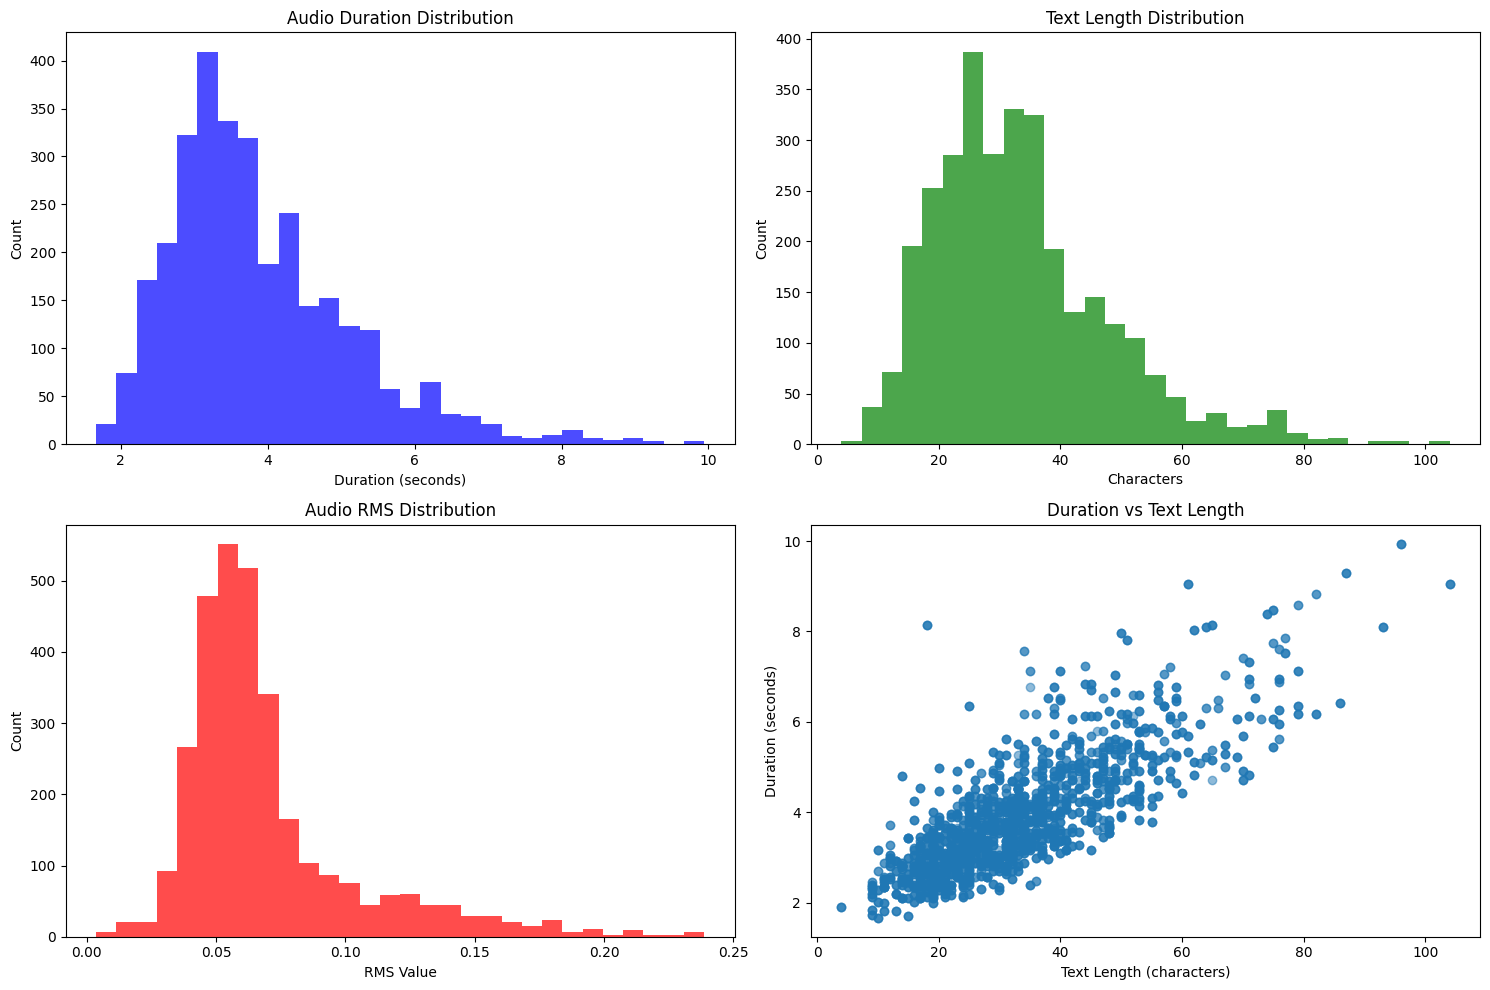

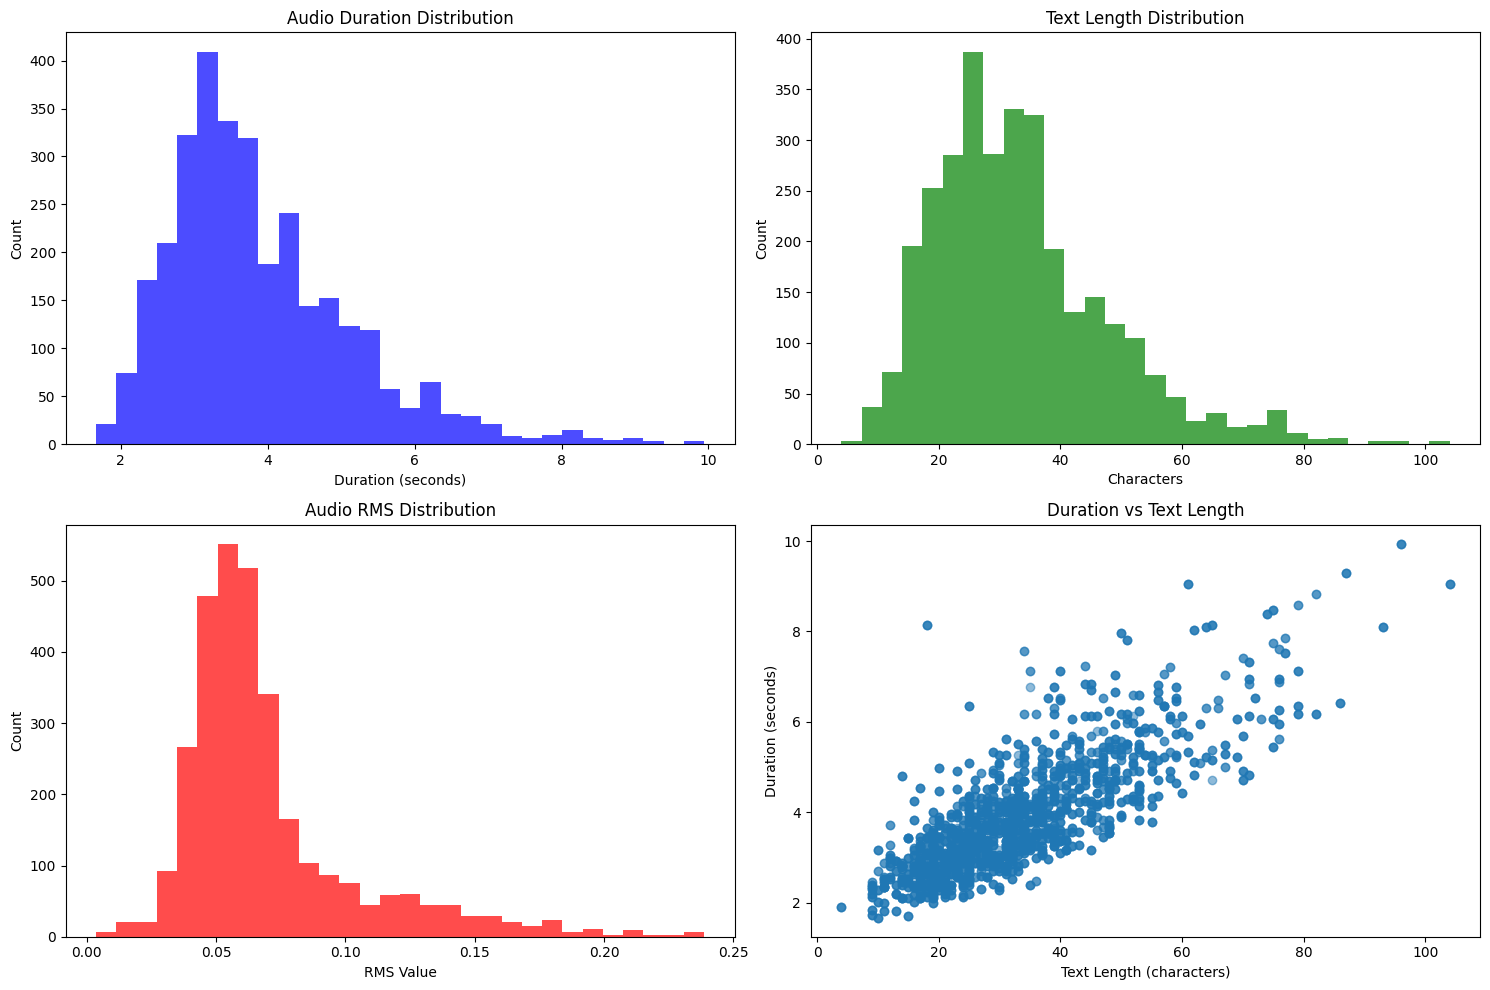

In [49]:
# Convert rms from tensor to float
# processed_df['rms'] = processed_df['rms'].apply(lambda x: x.item() if hasattr(x, 'item') else x)

analyze_dataset(processed_df)

In [50]:
processed_df.head()

,path,sentence,duration,rms
0,../../data/common_voice/cv-corpus-20.0-2024-12...,म पनि जान्छु है त अहिले लाई .,5.3355,0.045369
1,../../data/common_voice/cv-corpus-20.0-2024-12...,थाहा छैन .,3.1755,0.029186
2,../../data/common_voice/cv-corpus-20.0-2024-12...,म खाना पकाउँदै छु .,3.2475,0.034526
3,../../data/common_voice/cv-corpus-20.0-2024-12...,तिमी हराएर हो नि भाई .,3.1035,0.046298
4,../../data/common_voice/cv-corpus-20.0-2024-12...,"हैन, जर्मनी समुह चरणबाट बहिरिने सम्भावना धेरै ...",6.0555,0.042350
